In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import seaborn as sns
from sklearn .feature_selection import SelectPercentile, f_regression, RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Continuação:

#### Carregar o dataset do ficheiro criado anteriormente:

In [2]:
pd.set_option('display.max_columns', None) #permite visualizar todas as colunas
dataset=pd.read_csv('out.csv') #lê o ficheiro anteriormente guardado

# Análise de dados:

#### Dados estatísticos:

- Contagem
- Média;
- Desvio Padrão;
- Máximo e mínimo;
- Percentis.


In [3]:
dataset.describe() #retorna dados estatísticos do dataset

,Unnamed: 0,MW,Nº Atomos,Nº Ligações,Nº Eletrões Valência,Nº H Dadores,Nº H Aceitadores,Nº O,Nº C,Nº N,Nº F,Nº Cl,Nº S,Nº Na,Nº Br,Nº P,Nº I,Nº de ligações single,Nº de ligações double,Nº de ligações triple,Nº de ligações aromatic,Log(P),Nº de Álcoois,Nº de Cetonas,Nº de Ésteres,Nº de Aminas,Nº de Ácidos Carboxílicos,Nº de Éteres,Nº de Anéis,Área de Superfície Polar,Refratividade Molar,Índice de Balaban's J,Fator de Forma Inercial,Excentricidade,Asfericidade,Índice de Esfericidade,Raio de Giro,Y
count,910.00000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,901.000000,901.000000,901.000000,9.010000e+02,901.000000,910.000000
mean,454.50000,414.306843,55.592308,57.765934,130.529670,2.442857,5.808791,4.363736,21.249451,2.997802,0.308791,0.138462,0.285714,0.002198,0.010989,0.006593,0.001099,18.338462,2.614286,0.042857,10.542857,2.130127,1.042857,0.170330,0.254945,0.456044,0.173626,0.014286,3.196703,102.490022,109.842479,1.946342,0.001230,0.951108,0.439900,2.225112e-01,4.464701,-5.239498
std,262.83867,156.000892,22.817247,23.804511,51.228223,2.013849,2.932075,3.062711,8.502661,2.159227,0.882684,0.422880,0.560640,0.046855,0.104308,0.080976,0.033150,10.258794,1.913307,0.213228,6.497171,2.156939,1.857796,0.407032,0.563711,0.742948,0.409683,0.118731,1.642997,53.250920,41.090443,0.631190,0.008114,0.050569,0.194748,1.264344e-01,1.151868,0.777236
min,0.00000,32.026215,6.000000,5.000000,10.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.571400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.240000,8.142800,0.000001,0.000046,0.610472,0.024984,1.942267e-14,0.838704,-7.760000
25%,227.25000,307.214744,40.000000,42.000000,96.000000,1.000000,4.000000,2.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,6.000000,0.997125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,64.777500,82.308725,1.555872,0.000266,0.931559,0.275403,1.338036e-01,3.698203,-5.777444
50%,454.50000,400.136365,52.000000,54.000000,122.000000,2.000000,6.000000,4.000000,20.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,0.000000,12.000000,2.465750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,95.900000,104.787450,1.826482,0.000487,0.970945,0.450116,2.017166e-01,4.398701,-5.131224
75%,681.75000,514.329434,70.000000,72.000000,164.000000,3.000000,7.000000,6.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.000000,0.000000,16.000000,3.541850,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,133.100000,136.231325,2.230624,0.001023,0.985670,0.580261,2.969030e-01,5.261161,-4.641339
max,909.00000,966.430789,149.000000,153.000000,324.000000,14.000000,23.000000,23.000000,53.000000,9.000000,5.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,72.000000,14.000000,2.000000,30.000000,8.687800,14.000000,2.000000,3.000000,4.000000,2.000000,1.000000,10.000000,374.130000,253.772400,4.669421,0.240423,0.999443,0.903452,7.163596e-01,8.592055,-3.510000


Através da visualização dos descritores anteriormente apresentados, é perceptível a existência de nove missing values nos cinco descritores 3D. Isto alerta para a necessidade de efetuar o tratamento dos mesmos numa fase posterior. 

### Representação gráfica:

De forma a explorar a variância dos dados do Dataset, recorreram-se a diferentes formas de representação gráfica abaixo apresentadas.

#### Gráfico circular da percentagem das moléculas com a presença de um certo grupo funcional:

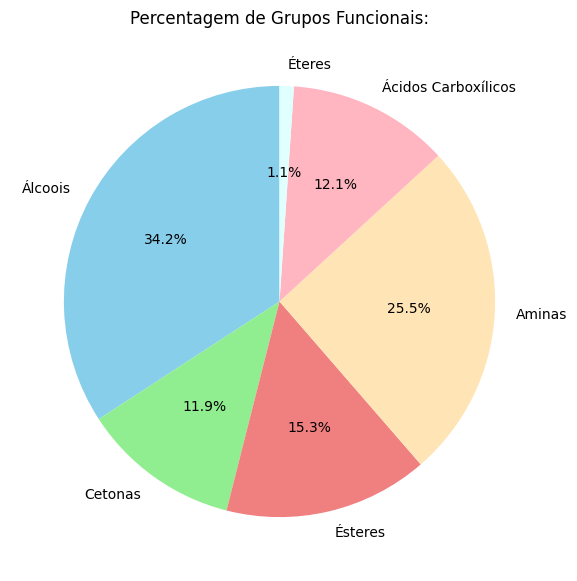

In [4]:
n_mol_alcoois=0
for quantidade in dataset['Nº de Álcoois']: #se o grupo fucional Álcool estiver presente na molécula acrescenta 1
    if quantidade>0:
       n_mol_alcoois+=1

n_mol_cetonas=0
for quantidade in dataset['Nº de Cetonas']: #se o grupo fucional Cetona estiver presente na molécula acrescenta 1
    if quantidade>0:
       n_mol_cetonas+=1

n_mol_esteres=0
for quantidade in dataset['Nº de Ésteres']: #se o grupo fucional Éster estiver presenten a molécula acrescenta 1
    if quantidade>0:
       n_mol_esteres+=1
    
n_mol_aminas=0
for quantidade in dataset['Nº de Aminas']: #se o grupo fucional Amina estiver presenten a molécula acrescenta 1
    if quantidade>0:
       n_mol_aminas+=1

n_mol_acidos=0
for quantidade in dataset['Nº de Ácidos Carboxílicos'] : #se o grupo fucional Ácido Carboxílico estiver presenten a molécula acrescenta 1
    if quantidade>0:
       n_mol_acidos+=1

n_mol_eteres=0
for quantidade in dataset['Nº de Éteres'] : #se o grupo fucional Éter estiver presenten a molécula acrescenta 1
    if quantidade>0:
       n_mol_eteres+=1

total=n_mol_alcoois+n_mol_cetonas+n_mol_esteres+n_mol_aminas+n_mol_acidos+n_mol_eteres #cálculo das percentagens da presença dos grupos funcionais

percentagem_alcoois = [n_mol_alcoois / total* 100]
percentagem_cetonas = [n_mol_cetonas / total * 100]
percentagem_esteres = [n_mol_esteres / total * 100]
percentagem_aminas = [n_mol_aminas / total * 100]
percentagem_acidos = [n_mol_acidos / total * 100]
percentagem_eteres = [n_mol_eteres / total * 100]

# Cria gráfico circular com a presença dos grupos funcionais
labels = ['Álcoois', 'Cetonas', 'Ésteres','Aminas','Ácidos Carboxílicos','Éteres']
sizes = [sum(percentagem_alcoois), sum(percentagem_cetonas), sum(percentagem_esteres),sum(percentagem_aminas),sum(percentagem_acidos),sum(percentagem_eteres)]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors = ['skyblue', 'lightgreen', 'lightcoral', 'moccasin', 'lightpink', 'lightcyan'])

plt.title('Percentagem de Grupos Funcionais:')
plt.show()

De todas as moléculas com grupos funcionais existentem 34,2% com o grupo funcional álcool, sendo este o grupo funcional predominantemente presente. Além disso é de notar que existem outros grupos presentes tais como aminas, ésteres, ácidos carboxílicos, cetonas e éteres. Estes últimos apresentam uma presença reduzida nas moléculas deste Dataset. 

#### Gráfico de barras referente ao número dos vários tipos de ligações:

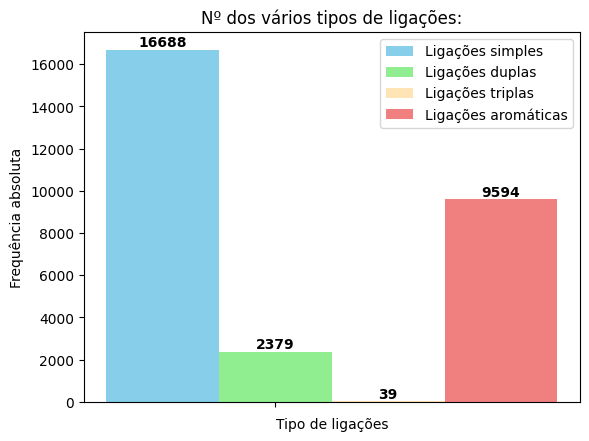

In [5]:
# Criar gráfico de barras para a contagem do tipo de ligações no dataset
categorias = ['']

valores_coluna1 = [sum(dataset['Nº de ligações single'])]
valores_coluna2 = [sum(dataset['Nº de ligações double'])]
valores_coluna3 = [sum(dataset['Nº de ligações triple'])]
valores_coluna4 = [sum(dataset['Nº de ligações aromatic'])]

largura_barra = 0.25

posicoes_coluna1 = np.arange(len(categorias))
posicoes_coluna2 = [x + largura_barra for x in posicoes_coluna1]
posicoes_coluna3 = [x + largura_barra for x in posicoes_coluna2]
posicoes_coluna4 = [x + largura_barra for x in posicoes_coluna3]

plt.bar(posicoes_coluna1, valores_coluna1, largura_barra, label='Ligações simples', color='skyblue')
plt.bar(posicoes_coluna2, valores_coluna2, largura_barra, label='Ligações duplas', color='lightgreen')
plt.bar(posicoes_coluna3, valores_coluna3, largura_barra, label='Ligações triplas', color='moccasin')
plt.bar(posicoes_coluna4, valores_coluna4, largura_barra, label='Ligações aromáticas', color='lightcoral')

plt.xlabel('Tipo de ligações')
plt.ylabel('Frequência absoluta')
plt.title('Nº dos vários tipos de ligações:')
plt.xticks([x + largura_barra for x in posicoes_coluna1], categorias)
plt.legend()

# Adiciona o número de ligações de cada molécula à barra correspondente
for i, valor in enumerate(valores_coluna1):
    plt.text(posicoes_coluna1[i], valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

for i, valor in enumerate(valores_coluna2):
    plt.text(posicoes_coluna2[i], valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

for i, valor in enumerate(valores_coluna3):
    plt.text(posicoes_coluna3[i], valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

for i, valor in enumerate(valores_coluna4):
    plt.text(posicoes_coluna4[i], valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

plt.show()

Como era de esperar, as ligações simples são as mais predominantes e existe um número escasso de ligações triplas, sendo que na representação acima estas quase não são perceptíveis.

### Correlação entre descritores - Matriz de correlação (Heat Map)

<Axes: >

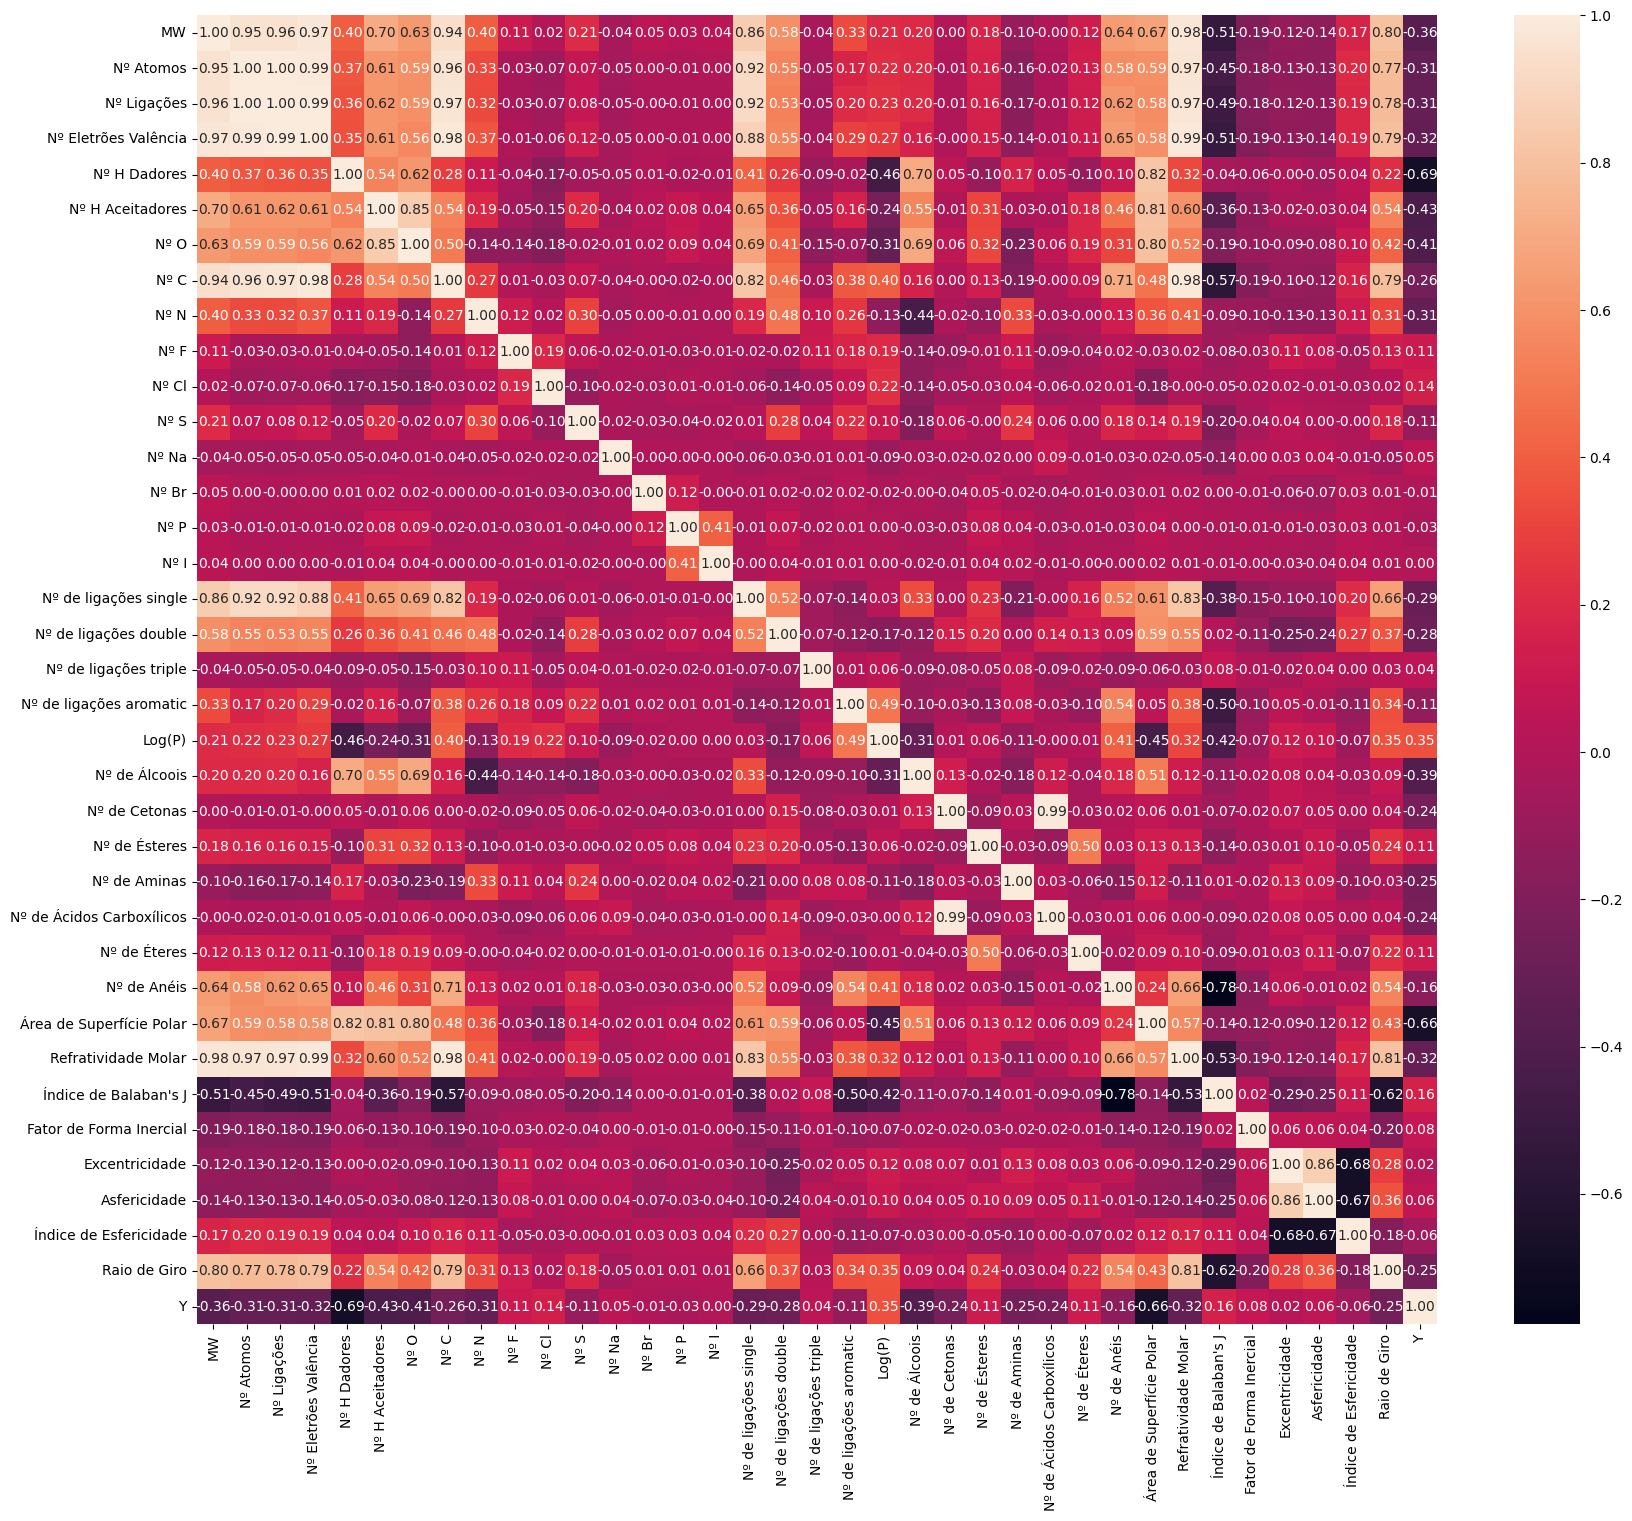

In [6]:
plt.figure(figsize=(20, 17))
sns.heatmap(dataset.iloc[:, 3:].corr(method='pearson'), annot=True, fmt=".2f") #matriz de correlação

Através da figura acima (heat map) representada é possível perceber a relação que cada um dos descritores estabelece entre si. Consegue-se concluir se entre um par de descritores, existe uma relação de proporcionalidade direta ou inversa. 
A cores mais claras temos representadas relações de proporcionalidade direta como é o caso do Nº de átomos e o número de ligações que tem um coeficiente de correlação de 1, ou o caso do Nº de cetonas e o Nº de ácidos carboxílicos.
Relativamente a relações de proporcionalidade inversa, representada a cores mais escuras, temos o caso do Nº de anéis e o índice de Balaban's J que apresenta uma correção negativa de -0.78. 

# Pré-processamento:

De forma a trabalhar com o Dataset e aplicar o mesmo em modelos de Machine Learning é necessário primeiro efetuar um pré-processamento do mesmo. Nesta fase foi verificado tanto a presença de missing values como a presença de linhas duplicadas no mesmo.

### Tratamento de Missing Values:

Aqui é verificada a existência de missing values e os mesmos são substituídos pela média de cada uma das colunas. Recorreu-se à média uma vez que os mesmos são valores numéricos.

In [7]:
print("Existem",dataset.isna().sum().sum(),"missing values no Dataset.") #conta o número de missing values 

# Preenche os valores ausentes em cada coluna com a média daquela coluna
for coluna in dataset.columns[3:]:
    dataset[coluna] = dataset[coluna].fillna(dataset[coluna].mean())


Existem 45 missing values no Dataset


#### Pós-tratamento de missing-values

In [8]:
print("Agora existem",dataset.isna().sum().sum(), "missing values no Dataset.") #conta o número de missing values 

Agora existem 0 missing values


#### Verificar se existem linhas duplicadas:

É verificada a existência de linhas duplicadas no Dataset utilizado, para não alimentar informação duplicada aos modelos. Isto poderia causar o enviesamento dos modelos de aprendizagem.

In [9]:
# Verificar se há duplicatas em todo o dataset
any_duplicates = dataset.duplicated().any()

# Exibe o resultado
if any_duplicates:
    print("Há linhas duplicadas no Dataset.")
else:
    print("Não há linhas duplicadas no Dataset.")

Não há linhas duplicadas no Dataset.


### Seleção dos atributos 

In [10]:
atributos=dataset.iloc[:, 3:-1] #seleção do que é o nossos dados de input
atributos

,MW,Nº Atomos,Nº Ligações,Nº Eletrões Valência,Nº H Dadores,Nº H Aceitadores,Nº O,Nº C,Nº N,Nº F,Nº Cl,Nº S,Nº Na,Nº Br,Nº P,Nº I,Nº de ligações single,Nº de ligações double,Nº de ligações triple,Nº de ligações aromatic,Log(P),Nº de Álcoois,Nº de Cetonas,Nº de Ésteres,Nº de Aminas,Nº de Ácidos Carboxílicos,Nº de Éteres,Nº de Anéis,Área de Superfície Polar,Refratividade Molar,Índice de Balaban's J,Fator de Forma Inercial,Excentricidade,Asfericidade,Índice de Esfericidade,Raio de Giro
0,290.079038,35,37,86,5,6,6,15,0,0,0,0,0,0,0,0,11,0,0,12,1.54610,5,0,0,0,0,0,3,110.38,72.6230,1.997881,0.001135,0.980489,0.522579,0.154937,3.726571
1,245.177964,41,40,92,1,1,1,16,1,0,0,0,0,0,0,0,12,4,1,0,3.23070,0,0,0,0,0,0,0,29.10,77.9517,3.686926,0.001827,0.995380,0.739776,0.105030,4.726393
2,299.152144,43,47,102,1,4,3,18,1,0,0,0,0,0,0,0,19,1,0,6,1.50110,1,0,0,0,0,0,5,41.93,82.4638,1.822365,0.000760,0.895333,0.187251,0.425906,3.017348
3,113.058912,15,15,34,2,2,1,4,3,0,0,0,0,0,0,0,6,2,0,0,-1.01723,0,0,0,0,0,0,1,56.19,28.4994,2.639594,0.005151,0.940963,0.320681,0.147726,1.875469
4,337.204179,52,56,122,1,3,2,22,1,0,0,0,0,0,0,0,22,1,1,5,4.22100,1,0,0,0,0,0,5,46.26,96.3528,1.531985,0.001055,0.981304,0.535340,0.353556,3.854987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,172.146330,32,31,64,1,1,2,10,0,0,0,0,0,0,0,0,10,1,0,0,3.21170,1,1,0,0,1,0,0,37.30,50.2458,2.861387,0.004148,0.995576,0.745407,0.160030,3.826834
906,330.073953,38,40,96,3,7,7,17,0,0,0,0,0,0,0,0,8,1,0,17,2.59400,3,0,0,0,0,0,3,109.36,86.0184,2.273267,0.000834,0.981272,0.530120,0.094211,4.086181
907,703.362136,101,105,242,4,7,6,43,3,0,0,0,0,0,0,0,28,4,0,24,5.66390,2,0,1,0,0,0,5,128.20,202.0750,1.454537,0.001230,0.951108,0.439900,0.222511,4.464701
908,719.278898,93,99,226,2,9,7,37,5,1,0,1,0,0,0,0,34,6,0,17,4.20832,0,0,0,0,0,0,7,156.89,186.5442,1.213642,0.000116,0.947694,0.328140,0.299922,6.051081


#### Normalização dos Dados

Normalizar os dados ajuda a garantir que todas as características tenham escalas semelhantes, evitando que características com magnitudes maiores dominem o processo de treinamento.
Uma vez que existem atributos cujo valor pode ser negativo, a escala de normalização escolhida foi entre -1 e 1.

In [11]:
scaler = MinMaxScaler(feature_range=(-1, 1)) #escala de normalização de -1 a 1
atributos= pd.DataFrame(scaler.fit_transform(atributos), columns=atributos.columns)
atributos.head()

,MW,Nº Atomos,Nº Ligações,Nº Eletrões Valência,Nº H Dadores,Nº H Aceitadores,Nº O,Nº C,Nº N,Nº F,Nº Cl,Nº S,Nº Na,Nº Br,Nº P,Nº I,Nº de ligações single,Nº de ligações double,Nº de ligações triple,Nº de ligações aromatic,Log(P),Nº de Álcoois,Nº de Cetonas,Nº de Ésteres,Nº de Aminas,Nº de Ácidos Carboxílicos,Nº de Éteres,Nº de Anéis,Área de Superfície Polar,Refratividade Molar,Índice de Balaban's J,Fator de Forma Inercial,Excentricidade,Asfericidade,Índice de Esfericidade,Raio de Giro
0,-0.447664,-0.594406,-0.567568,-0.515924,-0.285714,-0.545455,-0.478261,-0.461538,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.694444,-1.000000,-1.0,-0.200000,0.121519,-0.285714,-1.0,-1.0,-1.0,-1.0,-1.0,-0.4,-0.422255,-0.474980,-0.144271,-0.990942,0.902545,0.132871,-0.567432,-0.255066
1,-0.543770,-0.510490,-0.527027,-0.477707,-0.857143,-1.000000,-0.913043,-0.423077,-0.777778,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.666667,-0.428571,0.0,-1.000000,0.328737,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.860552,-0.431592,0.579179,-0.985186,0.979113,0.627361,-0.706766,0.002841
2,-0.428244,-0.482517,-0.432432,-0.414013,-0.857143,-0.727273,-0.739130,-0.346154,-0.777778,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.472222,-0.857143,-1.0,-0.600000,0.115984,-0.857143,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-0.791367,-0.394853,-0.219447,-0.994063,0.464690,-0.630570,0.189083,-0.438012
3,-0.826558,-0.874126,-0.864865,-0.847134,-0.714286,-0.909091,-0.913043,-0.884615,-0.333333,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.833333,-0.714286,-1.0,-1.000000,-0.193789,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.8,-0.714471,-0.834250,0.130587,-0.957527,0.699311,-0.326789,-0.587564,-0.732563
4,-0.346797,-0.356643,-0.310811,-0.286624,-0.857143,-0.818182,-0.826087,-0.192308,-0.777778,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.388889,-0.857143,0.0,-0.666667,0.450551,-0.857143,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-0.768017,-0.281764,-0.343823,-0.991605,0.906737,0.161922,-0.012909,-0.221941


# Etapa 2:

Como foi verificado através do mapa de correlação existem descritores que têm uma forte relacão entre eles, o que indica que se deve proceder à filtragem de certas colunas e para isso serão utilizadas técnicas de redução de dimensionalidade adequadas aos dados.
Dentro das técnica existentes, explorou-se a redução da dimensionalidade recorrendo à seleção por percentil, por regressão linear e por PCA.

#### Seleção por percentil

Seleção de dados com base na classificação de ANOVA, para identificar todas as colunas, isto é, todos os descritores com um percentil mínimo de 50.

In [12]:
selector=SelectPercentile(f_regression,percentile=50) #queremos 50% dos atributos
selector.fit(atributos,dataset["Y"])  #variável alvo é o 'Y'
selected_features=selector.transform(atributos)
df_percent = pd.DataFrame(selected_features)
df_percent #usa-se este para modelo de Machine Learning

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.447664,-0.594406,-0.567568,-0.515924,-0.285714,-0.545455,-0.478261,-0.461538,-1.000000,-0.694444,-1.000000,0.121519,-0.285714,-1.0,-1.0,-0.422255,-0.474980,-0.255066
1,-0.543770,-0.510490,-0.527027,-0.477707,-0.857143,-1.000000,-0.913043,-0.423077,-0.777778,-0.666667,-0.428571,0.328737,-1.000000,-1.0,-1.0,-0.860552,-0.431592,0.002841
2,-0.428244,-0.482517,-0.432432,-0.414013,-0.857143,-0.727273,-0.739130,-0.346154,-0.777778,-0.472222,-0.857143,0.115984,-0.857143,-1.0,-1.0,-0.791367,-0.394853,-0.438012
3,-0.826558,-0.874126,-0.864865,-0.847134,-0.714286,-0.909091,-0.913043,-0.884615,-0.333333,-0.833333,-0.714286,-0.193789,-1.000000,-1.0,-1.0,-0.714471,-0.834250,-0.732563
4,-0.346797,-0.356643,-0.310811,-0.286624,-0.857143,-0.818182,-0.826087,-0.192308,-0.777778,-0.388889,-0.857143,0.450551,-0.857143,-1.0,-1.0,-0.768017,-0.281764,-0.221941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.700087,-0.636364,-0.648649,-0.656051,-0.857143,-1.000000,-0.826087,-0.653846,-1.000000,-0.722222,-0.857143,0.326400,-0.857143,0.0,-1.0,-0.816334,-0.657183,-0.229203
906,-0.362058,-0.552448,-0.527027,-0.452229,-0.571429,-0.454545,-0.391304,-0.384615,-1.000000,-0.777778,-0.857143,0.250418,-0.571429,-1.0,-1.0,-0.427755,-0.365910,-0.162304
907,0.436928,0.328671,0.351351,0.477707,-0.428571,-0.454545,-0.478261,0.615385,-0.333333,-0.222222,-0.428571,0.628038,-0.714286,-1.0,-1.0,-0.326161,0.579062,-0.064663
908,0.470996,0.216783,0.270270,0.375796,-0.714286,-0.272727,-0.391304,0.384615,0.111111,-0.055556,-0.142857,0.448991,-1.000000,-1.0,-1.0,-0.171452,0.452605,0.344548


In [13]:
selected_features_mask = selector.get_support()
selected_features_df = atributos.loc[:, selected_features_mask] # Mantem apenas as colunas correspondentes às características selecionadas
selected_features_df

,MW,Nº Atomos,Nº Ligações,Nº Eletrões Valência,Nº H Dadores,Nº H Aceitadores,Nº O,Nº C,Nº N,Nº de ligações single,Nº de ligações double,Log(P),Nº de Álcoois,Nº de Cetonas,Nº de Aminas,Área de Superfície Polar,Refratividade Molar,Raio de Giro
0,-0.447664,-0.594406,-0.567568,-0.515924,-0.285714,-0.545455,-0.478261,-0.461538,-1.000000,-0.694444,-1.000000,0.121519,-0.285714,-1.0,-1.0,-0.422255,-0.474980,-0.255066
1,-0.543770,-0.510490,-0.527027,-0.477707,-0.857143,-1.000000,-0.913043,-0.423077,-0.777778,-0.666667,-0.428571,0.328737,-1.000000,-1.0,-1.0,-0.860552,-0.431592,0.002841
2,-0.428244,-0.482517,-0.432432,-0.414013,-0.857143,-0.727273,-0.739130,-0.346154,-0.777778,-0.472222,-0.857143,0.115984,-0.857143,-1.0,-1.0,-0.791367,-0.394853,-0.438012
3,-0.826558,-0.874126,-0.864865,-0.847134,-0.714286,-0.909091,-0.913043,-0.884615,-0.333333,-0.833333,-0.714286,-0.193789,-1.000000,-1.0,-1.0,-0.714471,-0.834250,-0.732563
4,-0.346797,-0.356643,-0.310811,-0.286624,-0.857143,-0.818182,-0.826087,-0.192308,-0.777778,-0.388889,-0.857143,0.450551,-0.857143,-1.0,-1.0,-0.768017,-0.281764,-0.221941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.700087,-0.636364,-0.648649,-0.656051,-0.857143,-1.000000,-0.826087,-0.653846,-1.000000,-0.722222,-0.857143,0.326400,-0.857143,0.0,-1.0,-0.816334,-0.657183,-0.229203
906,-0.362058,-0.552448,-0.527027,-0.452229,-0.571429,-0.454545,-0.391304,-0.384615,-1.000000,-0.777778,-0.857143,0.250418,-0.571429,-1.0,-1.0,-0.427755,-0.365910,-0.162304
907,0.436928,0.328671,0.351351,0.477707,-0.428571,-0.454545,-0.478261,0.615385,-0.333333,-0.222222,-0.428571,0.628038,-0.714286,-1.0,-1.0,-0.326161,0.579062,-0.064663
908,0.470996,0.216783,0.270270,0.375796,-0.714286,-0.272727,-0.391304,0.384615,0.111111,-0.055556,-0.142857,0.448991,-1.000000,-1.0,-1.0,-0.171452,0.452605,0.344548


#### Seleção por regressão linear

A seleção de características (feature selection) usando regressão linear é uma técnica que envolve o uso de um modelo de regressão linear para identificar as características mais relevantes para prever a variável de resposta. 

In [14]:
estimador= LinearRegression()
selector =RFE(estimador, n_features_to_select=18, step=1) #queremos 18 atributos escolhidos através de regressão linear
selector.fit(atributos,dataset["Y"]) #variável alvo é o 'Y'
selected_features=selector.transform(atributos)
df_regress = pd.DataFrame(selected_features)
df_regress

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.447664,-0.594406,-0.567568,-0.478261,-0.461538,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.694444,-1.000000,-1.0,-0.200000,-0.474980
1,-0.543770,-0.510490,-0.527027,-0.913043,-0.423077,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.666667,-0.428571,0.0,-1.000000,-0.431592
2,-0.428244,-0.482517,-0.432432,-0.739130,-0.346154,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.472222,-0.857143,-1.0,-0.600000,-0.394853
3,-0.826558,-0.874126,-0.864865,-0.913043,-0.884615,-0.333333,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.833333,-0.714286,-1.0,-1.000000,-0.834250
4,-0.346797,-0.356643,-0.310811,-0.826087,-0.192308,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.388889,-0.857143,0.0,-0.666667,-0.281764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.700087,-0.636364,-0.648649,-0.826087,-0.653846,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.722222,-0.857143,-1.0,-1.000000,-0.657183
906,-0.362058,-0.552448,-0.527027,-0.391304,-0.384615,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.777778,-0.857143,-1.0,0.133333,-0.365910
907,0.436928,0.328671,0.351351,-0.478261,0.615385,-0.333333,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.222222,-0.428571,-1.0,0.600000,0.579062
908,0.470996,0.216783,0.270270,-0.391304,0.384615,0.111111,-0.6,-1.0,-0.333333,-1.0,-1.0,-1.0,-1.0,-0.055556,-0.142857,-1.0,0.133333,0.452605


In [15]:
selected_features_mask = selector.get_support()
selected_features_df = atributos.loc[:, selected_features_mask] #verificamos que os dados escolhidos são diferente
selected_features_df

,MW,Nº Atomos,Nº Ligações,Nº O,Nº C,Nº N,Nº F,Nº Cl,Nº S,Nº Na,Nº Br,Nº P,Nº I,Nº de ligações single,Nº de ligações double,Nº de ligações triple,Nº de ligações aromatic,Refratividade Molar
0,-0.447664,-0.594406,-0.567568,-0.478261,-0.461538,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.694444,-1.000000,-1.0,-0.200000,-0.474980
1,-0.543770,-0.510490,-0.527027,-0.913043,-0.423077,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.666667,-0.428571,0.0,-1.000000,-0.431592
2,-0.428244,-0.482517,-0.432432,-0.739130,-0.346154,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.472222,-0.857143,-1.0,-0.600000,-0.394853
3,-0.826558,-0.874126,-0.864865,-0.913043,-0.884615,-0.333333,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.833333,-0.714286,-1.0,-1.000000,-0.834250
4,-0.346797,-0.356643,-0.310811,-0.826087,-0.192308,-0.777778,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.388889,-0.857143,0.0,-0.666667,-0.281764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.700087,-0.636364,-0.648649,-0.826087,-0.653846,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.722222,-0.857143,-1.0,-1.000000,-0.657183
906,-0.362058,-0.552448,-0.527027,-0.391304,-0.384615,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.777778,-0.857143,-1.0,0.133333,-0.365910
907,0.436928,0.328671,0.351351,-0.478261,0.615385,-0.333333,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.222222,-0.428571,-1.0,0.600000,0.579062
908,0.470996,0.216783,0.270270,-0.391304,0.384615,0.111111,-0.6,-1.0,-0.333333,-1.0,-1.0,-1.0,-1.0,-0.055556,-0.142857,-1.0,0.133333,0.452605


## Redução da Dimensionalidade

Neste caso, a técnica escolhida para a redução de dimensionalidade passou pelo PCA (Principal Component Analysis), uma vez que se busca transformar as caracterísiticas num conjunto menor de características (os componentes principais) que são linearmente independentes.

### PCA

In [16]:
n = 15
pca = PCA(n_components=n)
pca.fit(atributos)
x_pca = pca.transform(atributos)
x_pca=pd.DataFrame(x_pca) 
x_pca #devolve 15 PCs 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.740400,0.057643,0.510265,-0.610346,-0.061681,-0.757240,0.235659,0.151667,-0.029405,-0.000603,0.132358,-0.008175,0.094381,0.001805,-0.072082
1,-1.243462,-0.079292,0.291925,-0.461471,0.361037,0.486188,-0.229765,-0.843783,0.254176,0.246803,-0.095891,-0.648706,0.728379,0.182519,0.282042
2,-0.594290,0.672627,-0.332681,-0.289347,-0.698929,-0.183928,-0.231545,-0.000206,0.025267,0.124804,-0.230280,0.512356,-0.086330,-0.089456,0.091074
3,-1.880686,0.605687,-0.236022,-0.035956,0.309649,0.029399,-0.065382,-0.261286,-0.052562,0.021081,0.316534,0.158028,-0.236570,-0.219454,0.167164
4,-0.378785,-0.053936,0.050799,-0.489450,-0.441426,0.004065,-0.291706,-0.422479,0.165265,0.228050,-0.459070,0.405701,0.688167,0.144855,0.482458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.629587,0.027955,1.308469,0.435180,-0.208074,0.445260,-0.114100,-0.470589,0.193011,0.143821,-0.075288,-0.206150,0.119173,0.136613,-0.153719
906,-0.577485,-0.219271,0.387457,-0.557253,-0.169411,-0.697919,0.068290,0.156691,-0.072337,-0.115000,0.266094,-0.297678,0.064578,-0.010058,-0.109924
907,1.806048,-0.310525,-0.077355,-0.473645,-0.495887,-0.170954,-0.239638,0.045942,-0.147412,-0.457377,-0.086059,-0.395378,-0.010975,-0.016858,-0.214397
908,1.973593,-0.225187,-0.491869,0.056256,-0.214599,-0.130119,-0.269080,-0.086680,0.280792,0.326738,0.141976,0.112272,-0.151201,-0.049559,-0.023164


#### Variância representada por PC

De forma a saber e a ter uma ideia de como os PCs usados podem explicar a variância do Dataset, recorreu-se à representação gráfica abaixo apresentada. Aqui, a propriedade 'explained_variance_ratio_' do objeto PCA fornece a proporção da variância total explicada por cada componente principal.   

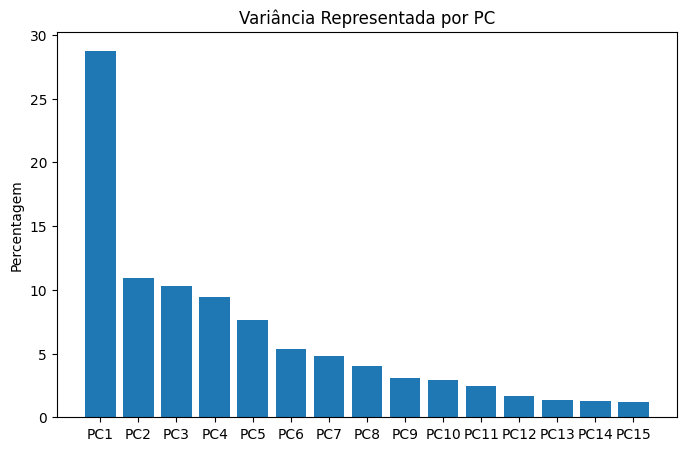

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância Representada por PC")
plt.ylabel("Percentagem")
plt.show()

Pode-se constatar que é no PC1 que a maior parte da variância do Dataset é explicada. Nos restantes verifica-se que há um decréscimo gradual da variância presente.

#### Escolha do valor de variância a ser explicado

Nesta parte personalizou-se o modelo PCA de forma a que o mesmo retesse componentes principais suficientes para explicar 90% da variância nos dados originais. Também é aqui calculado o número total de componentes principais que foram mantidos para atingir a percentagem desejada de variância explicada (90%).

In [18]:
pca_90 = PCA(n_components=0.9) 
pca_90.fit(atributos)
x_reduced = pca_90.transform(atributos)
total_pcs = x_reduced.shape[1]

print( "Total PCs necessários:",total_pcs )

Total PCs: 12


In [19]:
x_pca_usar=x_pca.loc[:, :11] #com base na célula de cima, escolhemos apenas 12 Pcs
x_pca_usar

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.740400,0.057643,0.510265,-0.610346,-0.061681,-0.757240,0.235659,0.151667,-0.029405,-0.000603,0.132358,-0.008175
1,-1.243462,-0.079292,0.291925,-0.461471,0.361037,0.486188,-0.229765,-0.843783,0.254176,0.246803,-0.095891,-0.648706
2,-0.594290,0.672627,-0.332681,-0.289347,-0.698929,-0.183928,-0.231545,-0.000206,0.025267,0.124804,-0.230280,0.512356
3,-1.880686,0.605687,-0.236022,-0.035956,0.309649,0.029399,-0.065382,-0.261286,-0.052562,0.021081,0.316534,0.158028
4,-0.378785,-0.053936,0.050799,-0.489450,-0.441426,0.004065,-0.291706,-0.422479,0.165265,0.228050,-0.459070,0.405701
...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.629587,0.027955,1.308469,0.435180,-0.208074,0.445260,-0.114100,-0.470589,0.193011,0.143821,-0.075288,-0.206150
906,-0.577485,-0.219271,0.387457,-0.557253,-0.169411,-0.697919,0.068290,0.156691,-0.072337,-0.115000,0.266094,-0.297678
907,1.806048,-0.310525,-0.077355,-0.473645,-0.495887,-0.170954,-0.239638,0.045942,-0.147412,-0.457377,-0.086059,-0.395378
908,1.973593,-0.225187,-0.491869,0.056256,-0.214599,-0.130119,-0.269080,-0.086680,0.280792,0.326738,0.141976,0.112272


# Etapa 3:

## Modelos Supervisionados de Machine Learning

Em machine learning, são treinados algoritmos de modo a encontrarem padrões e correlações em grandes conjuntos de dados e para tomarem as melhores decisões e fazerem as melhores previsões com base nessa análise. As aplicações de machine learning melhoram com a utilização e, a quantos mais dados tiverem acesso, mais exatas se tornam. Neste caso, visto que temos os dados das permeabilidade efectiva os modelos usados serão os de aprendizagem supervisionada, tal como os apresentados abaixo:

- Regressão linear()
- Random Forest()
- Gradient Boosting()
- SVM()


#### Divisão dos dados em 70% treino e 30% teste:

Os dados do Dataset precisam de ser divididos em duas categorias:
- Dados Treino: são os que são apresentados ao algoritmo de machine learning para criação do modelo. 
- Dados de Teste: são os serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_usar, dataset["Y"], test_size=0.3, random_state=34) 
#divisão dos dados 70/30 para treino e teste respetivamente para a varíavel alvo 'Y'
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(637, 12) (637,)
(273, 12) (273,)


### Regressão Linear:

#### Criação do modelo de regressão linear:

In [21]:
#Criação do modelo de regressão linear
modelo1=LinearRegression() 

#Imprime uma mensagem a indicar que o modelo foi treinado
modelo1.fit(X_train, y_train)
print( 'O modelo de regressão linear foi treinado!')

O modelo de regressão linear foi treinado!


#### Avaliação do desempenho do modelo usando três métricas: Erro Quadrático Médio (MSE) e R² (Coefficient of Determination) e Erro Absoluto Médio (MAE).

In [22]:
#Prever os Y segundo o modelo
y_rl_pred=modelo1.predict(X_test)

#Avaliação do modelo aplicado anteriormente com o erro quadrático médio, o r2 e o erro absoluto médio
mse = mean_squared_error(y_test, y_rl_pred)
r2 = r2_score(y_test, y_rl_pred)
mae = mean_absolute_error(y_test, y_rl_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.280 R²: 0.520 Erro Absoluto Médio: 0.419


#### Criação de um gráfico para avaliar o modelo de regressão linear:

<function matplotlib.pyplot.show(close=None, block=None)>

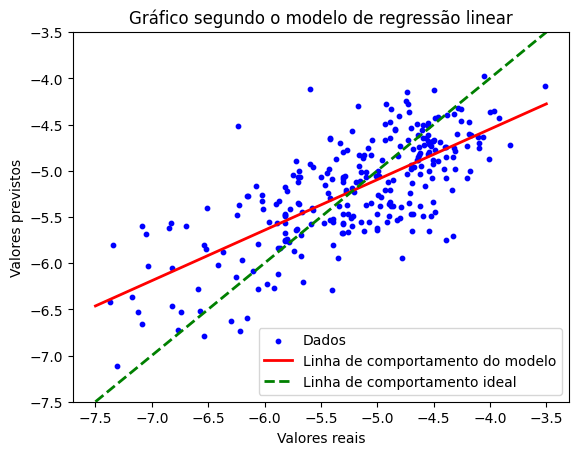

In [23]:
y_rl_pred=modelo1.predict(X_test)
x = np.array(y_test)
y = np.array(y_rl_pred)

x = x.reshape(-1, 1)

model = modelo1
model.fit(x, y)

x_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.scatter(x, y, color='blue', label='Dados',s=10)
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
plt.plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
plt.ylim(-7.5, -3.5)

plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.title('Gráfico segundo o modelo de regressão linear')
plt.show

Os valores da regressão linear (pontos a azul) não estão sobrepostos à reta vermelha (linha de comportamento do modelo) no gráfico uma vez que o modelo foi mal ajustado. O modelo de regressão linear não é a escolha ideal para representar a relação entre as variáveis deste Dataset, uma vez que a relação é não linear. A reta apresentada a verde demonstra o comportamento de um modelo ideal em que os valores previstos são iguais aos reais.

### Random Forest

#### Criação do modelo de random forest:

In [24]:
#Criação do modelo de random forest
modelo2=RandomForestRegressor()

#Imprime uma mensagem a indicar que o modelo foi treinado
modelo2.fit(X_train, y_train)
print( 'O modelo de random forest foi treinado!')

O modelo de random forest foi treinado!


#### Avaliação do desempenho do modelo usando três métricas: Erro Quadrático Médio (MSE) e R² (Coefficient of Determination) e Erro Absoluto Médio (MAE).

In [25]:
#Prever os Y segundo o modelo
y_rd_pred=modelo2.predict(X_test)

#Avaliação do modelo aplicado anteriormente com o erro quadrático médio, o r2 e o erro absoluto médio
mse = mean_squared_error(y_test, y_rd_pred)
r2 = r2_score(y_test, y_rd_pred)
mae = mean_absolute_error(y_test, y_rd_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.223 R²: 0.616 Erro Absoluto Médio: 0.375


#### Criação de um gráfico para avaliar o modelo de random forest:

<function matplotlib.pyplot.show(close=None, block=None)>

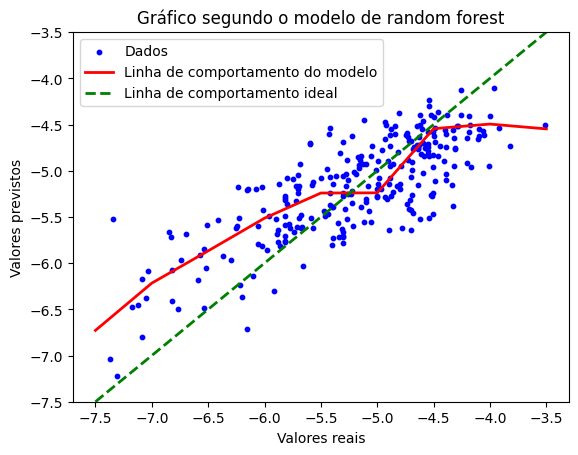

In [26]:
x = np.array(y_test)
y = np.array(y_rd_pred)

x = x.reshape(-1, 1)

model = modelo2
model.fit(x, y)

x_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.scatter(x, y, color='blue', label='Dados',s=10)
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
plt.plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
plt.ylim(-7.5, -3.5)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.title('Gráfico segundo o modelo de random forest')
plt.show

## Gradient Boosting

#### Criação do modelo de gradient boosting:

In [27]:
#Criação do modelo de random forest
modelo3=GradientBoostingRegressor()
#Imprime uma mensagem a indicar que o modelo foi treinado
modelo3.fit(X_train, y_train)
print( 'O modelo de gradient boosting foi treinado!')

O modelo de gradient boosting foi treinado!


#### Avaliação do desempenho do modelo usando três métricas: Erro Quadrático Médio (MSE) e R² (Coefficient of Determination) e Erro Absoluto Médio (MAE).

In [28]:
#Prever os Y segundo o modelo
y_gb_pred=modelo3.predict(X_test)

#Avaliação do modelo aplicado anteriormente com o erro quadrático médio, o r2 e o erro absoluto médio
mse = mean_squared_error(y_test, y_gb_pred)
r2 = r2_score(y_test, y_gb_pred)
mae = mean_absolute_error(y_test, y_gb_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.253 R²: 0.566 Erro Absoluto Médio: 0.386


#### Criação de um gráfico para avaliar o modelo de gradient boosting:

<function matplotlib.pyplot.show(close=None, block=None)>

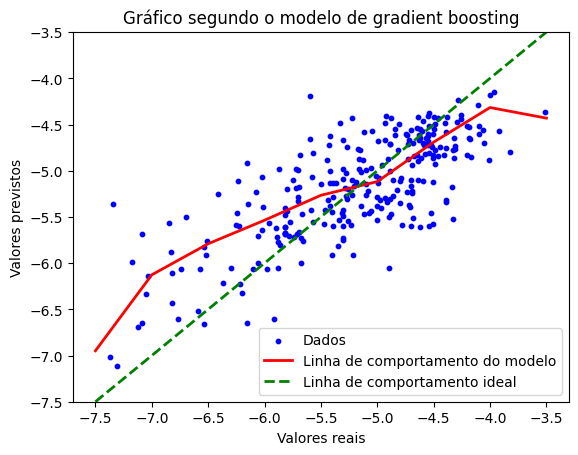

In [29]:
x = np.array(y_test)
y = np.array(y_gb_pred)

x = x.reshape(-1, 1)

model = modelo3
model.fit(x, y)

x_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.scatter(x, y, color='blue', label='Dados',s=10)
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
plt.plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
plt.ylim(-7.5, -3.5)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.title('Gráfico segundo o modelo de gradient boosting')
plt.show

## SVM

#### Criação do modelo de SVM:

In [30]:
#criação do modelo de SVM
modelo4=SVR(kernel='linear', C=1.0, epsilon=0.2)

#Imprime uma mensagem a indicar que o modelo foi treinado
modelo4.fit(X_train, y_train)
print( 'O modelo de SVM foi treinado!')

O modelo de SVM foi treinado!


#### Avaliação do desempenho do modelo usando três métricas: Erro Quadrático Médio (MSE) e R² (Coefficient of Determination) e Erro Absoluto Médio (MAE).

In [31]:
#Prever os Y segundo o modelo
y_SVM_pred=modelo4.predict(X_test)

#Avaliação do modelo aplicado anteriormente com o erro quadrático médio, o r2 e o erro absoluto médio
mse = mean_squared_error(y_test, y_SVM_pred)
r2 = r2_score(y_test, y_SVM_pred)
mae = mean_absolute_error(y_test, y_SVM_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.285 R²: 0.511 Erro Absoluto Médio: 0.419


#### Criação de um gráfico para avaliar o modelo de SVM:

<function matplotlib.pyplot.show(close=None, block=None)>

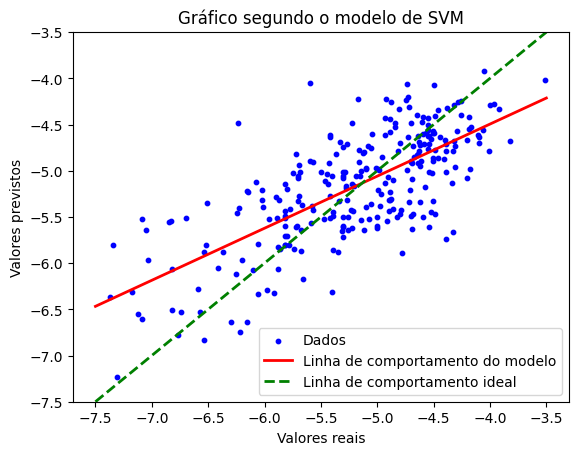

In [32]:
x = np.array(y_test)
y = np.array(y_SVM_pred)

x = x.reshape(-1, 1)

model = modelo4
model.fit(x, y)

x_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.scatter(x, y, color='blue', label='Dados', s=10)
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
plt.plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
plt.ylim(-7.5,-3.5)

plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.title('Gráfico segundo o modelo de SVM')
plt.show

### Comparação dos resultado:

   #### Regressão Linear:
   - Erro Quadrático Médio: 0.279 R²: 0.520 Erro Absoluto Médio: 0.419
   #### Random Forest:
   - Erro Quadrático Médio: 0.231 R²: 0.603 Erro Absoluto Médio: 0.381
   #### Gradient Boosting:
   - Erro Quadrático Médio: 0.250 R²: 0.571 Erro Absoluto Médio: 0.386 
   #### SVM:
   - Erro Quadrático Médio: 0.285 R²: 0.510 Erro Absoluto Médio: 0.420
    

# Interpretação:

#### Erro Quadrático Médio (MSE):
O MSE é uma medida da média dos quadrados dos erros entre as previsões e os valores reais. Quanto menor o MSE, melhor.    Nesse caso, o Random Forest tem o menor MSE (0.231), indicando que, em média, as suas previsões estão mais próximas dos valores reais no conjunto de teste.

#### R² (Coefficient of Determination): 
O R² é uma medida de quão bem as previsões do modelo se ajustam aos valores reais. Um R² mais próximo de 1 é desejável, indicando um ajuste melhor. Novamente, o Random Forest tem o maior R² (0.603), indicando que explica mais da variabilidade nos dados em comparação com os outros modelos.

#### Erro Absoluto Médio (MAE):
O Erro Absoluto Médio é uma métrica de avaliação comum para modelos de regressão. Ele mede a média das diferenças absolutas entre os valores previstos pelo modelo e os valores reais. Quanto menor o MSE, melhor. Nesse caso, o Random Forest tem o menor MSE (0.381), indicando que este modelo teve a menor diferença absoluta média entre as previsões e os valores reais.

### Conclusões:

O modelo Random Forest parece ter o melhor desempenho global, com o menor MSE e MAE e o maior R².
A Regressão Linear e o SVM têm um R² mais baixo, indicando que não explicam a variabilidade tão bem quanto os outros modelos.

## Grid Search

O Grid Search é especialmente útil quando há várias opções para os hiperparâmetros e é difícil determinar manualmente qual conjunto de valores funcionará melhor. Pode ser computacionalmente intensivo, pois envolve treinar e avaliar o modelo para cada combinação no grid. No entanto, é uma técnica valiosa para otimizar o desempenho do modelo e evitar a escolha manual de hiperparâmetros, o que pode ser demorado e subjetivo.

#### Otimização de hiperparâmetros através do grid search:

In [33]:
#Aplicação do grid search
param_grid = {'n_estimators': [100, 200], 'max_depth': [10,11], 'min_samples_split': [4,5]}
modelo5 = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, n_jobs=-1)

#Imprime os melhores hiperparâmetros do modelo
modelo5.fit(X_train, y_train)
print('Os melhores parâmetros são:', modelo5.best_params_)

#Imprime uma mensagem a indicar que o modelo foi treinado
print( 'O modelo foi otimizado!')

Os melhores parâmetros são: {'max_depth': 11, 'min_samples_split': 4, 'n_estimators': 200}
O modelo foi otimizado!


#### Avaliação do desempenho do modelo usando três métricas: Erro Quadrático Médio (MSE) e R² (Coefficient of Determination) e Erro Absoluto Médio (MAE).

In [34]:
#Prever os Y segundo o modelo
y_gs_pred=modelo5.predict(X_test)

#Avaliação do modelo aplicado anteriormente com o erro quadrático médio, o r2 e o erro absoluto médio
mse = mean_squared_error(y_test, y_gs_pred)
r2 = r2_score(y_test, y_gs_pred)
mae = mean_absolute_error(y_test, y_gs_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.230 R²: 0.606 Erro Absoluto Médio: 0.377


#### Criação de um gráfico para avaliar o modelo de grid search:

<function matplotlib.pyplot.show(close=None, block=None)>

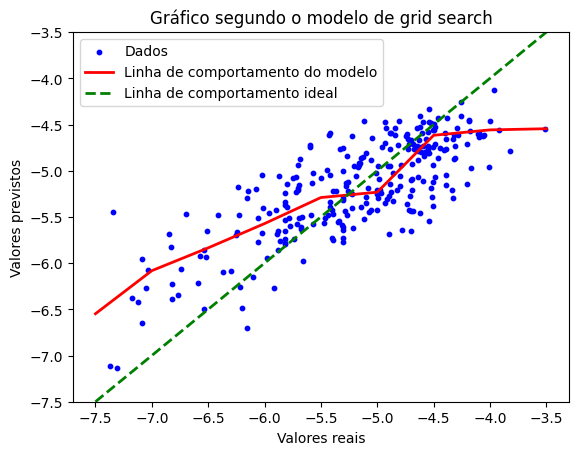

In [35]:
x = np.array(y_test)
y = np.array(y_gs_pred)

x = x.reshape(-1, 1)

model = modelo5
model.fit(x, y)

x_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.scatter(x, y, color='blue', label='Dados', s=10)
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
plt.plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
plt.ylim(-7.5,-3.5)

plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.title('Gráfico segundo o modelo de grid search')
plt.show

#### Comparação dos gráficos do modelo random forest e do mesmo modelo otimizado através do grid search:

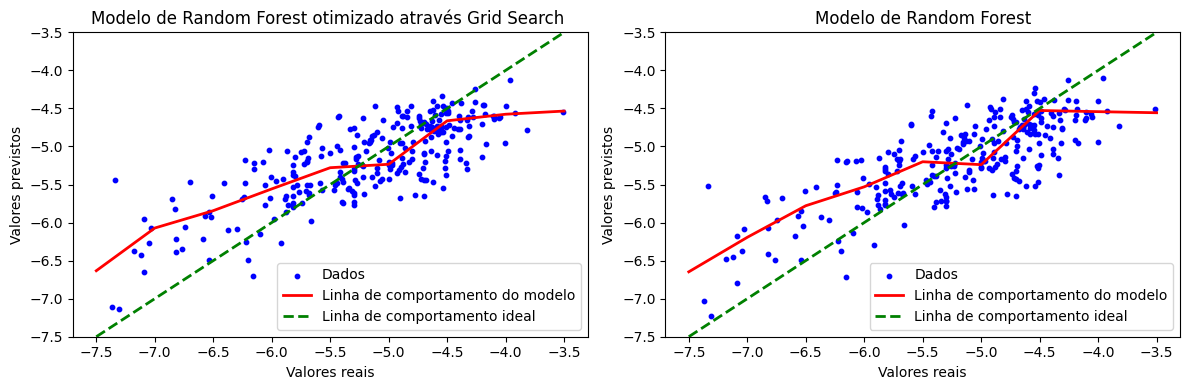

In [36]:
# Gráfico 1 - Modelo de Grid Search
x1 = np.array(y_test)
y1 = np.array(y_gs_pred)

x1 = x1.reshape(-1, 1)

model1 = modelo5
model1.fit(x1, y1)

x1_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y1_pred = model1.predict(x1_pred)

# Configuração do primeiro gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(x1, y1, color='blue', label='Dados',s=10)
axs[0].plot(x1_pred, y1_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
x_ = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y_=x_
axs[0].plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
axs[0].set_ylim(-7.5, -3.5)
axs[0].set_xlabel('Valores reais')
axs[0].set_ylabel('Valores previstos')
axs[0].legend()
axs[0].set_title('Modelo de Random Forest otimizado através Grid Search ')

# Gráfico 2 - Modelo de Random Forest
x2 = np.array(y_test)
y2 = np.array(y_rd_pred)

x2 = x2.reshape(-1, 1)

model2 = modelo2
model2.fit(x2, y2)

x2_pred = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5]).reshape(-1, 1)
y2_pred = model2.predict(x2_pred)
# Configuração do segundo gráfico
axs[1].scatter(x2, y2, color='blue', label='Dados',s=10)
axs[1].plot(x2_pred, y2_pred, color='red', linewidth=2, label='Linha de comportamento do modelo')
axs[1].plot(x_, y_, color='green', linewidth=2,linestyle='dashed', label='Linha de comportamento ideal')
axs[1].set_ylim(-7.5, -3.5)
axs[1].set_xlabel('Valores reais')
axs[1].set_ylabel('Valores previstos')
axs[1].legend()
axs[1].set_title('Modelo de Random Forest')

# Ajusta o layout
plt.tight_layout()

# Exibe os gráficos
plt.show()


### Comparação dos resultados:

   #### Random Forest:
   - Erro Quadrático Médio: 0.231 R²: 0.603 Erro Absoluto Médio: 0.381
   #### Random Forest otimizado através do grid search:
   - Erro Quadrático Médio: 0.229 R²: 0.607 Erro Absoluto Médio: 0.379

### Conclusões:
Apesar de a diferença visual dos gráficos permitir perceber uma ligeira aproximação do modelo otimizado através do grid search com o comportamento ideal, conseguiram-se verificar estas melhorias através da diminuição do erro quadrático médio e do erro absoluto médio e o aumento do R².

## Cross-Validation

Cross Validation é uma técnica estatística usada para avaliar a capacidade de generalização de um modelo de machine learning. Em vez de depender de uma única divisão de dados em conjuntos de treino e teste, a validação cruzada utiliza múltiplas divisões, permitindo que o modelo seja treinado e testado em diferentes subconjuntos dos dados.

#### Aplicação do cross-validation ao modelo de regressão linear:

In [37]:
#Aplicação do cross validation ao modelo de regressão linear com 10 folds
cross_mod1 = cross_val_score(estimator=modelo1, X=x_pca_usar, y=dataset["Y"], cv = 10, scoring='r2')

#Imprime uma mensagem a indicar que o modelo foi treinado, os valores e a respetiva média
print('O modelo foi treinado!')
print('Valores de Cross-Validation(R²):', cross_mod1)
print('Média dos valores de Cross-Validation:', f'{cross_mod1.mean():.3f}')

O modelo foi treinado!
Valores de Cross-Validation(R²): [0.61382715 0.47953713 0.67687552 0.49787842 0.63169603 0.43681163
 0.52315107 0.30129503 0.57483665 0.57183628]
Média dos valores de Cross-Validation: 0.531


#### Aplicação do cross-validation ao modelo de random forest:

In [38]:
#Aplicação do cross validation ao modelo de random forest com 10 folds
cross_mod2 = cross_val_score(estimator=modelo2, X=x_pca_usar, y=dataset["Y"], cv = 10, scoring='r2')

#Imprime uma mensagem a indicar que o modelo foi treinado, os valores e a respetiva média
print('O modelo foi treinado!')
print('Valores de Cross-Validation(R²):', cross_mod2)
print('Média dos valores de Cross-Validation:', f'{cross_mod2.mean():.3f}')

O modelo foi treinado!
Valores de Cross-Validation(R²): [0.49006184 0.58291639 0.68376502 0.54485068 0.67854343 0.54069735
 0.613706   0.47108742 0.63237365 0.6586555 ]
Média dos valores de Cross-Validation: 0.590


#### Aplicação do cross-validation ao modelo de gradient boosting:

In [39]:
#Aplicação do cross validation ao modelo de gradient boosting com 10 folds
cross_mod3 = cross_val_score(estimator=modelo3, X=x_pca_usar, y=dataset["Y"], cv = 10, scoring='r2')

#Imprime uma mensagem a indicar que o modelo foi treinado, os valores e a respetiva média
print('O modelo foi treinado!')
print('Valores de Cross-Validation(R²):', cross_mod3)
print('Média dos valores de Cross-Validation:', f'{cross_mod3.mean():.3f}')

O modelo foi treinado!
Valores de Cross-Validation(R²): [0.56032427 0.49795368 0.65255122 0.52358792 0.64424999 0.45680099
 0.61818072 0.48873441 0.62217254 0.6361948 ]
Média dos valores de Cross-Validation: 0.570


#### Aplicação do cross-validation ao modelo de SVM:

In [40]:
#Aplicação do cross validation ao modelo de SVM com 10 folds
cross_mod4 = cross_val_score(estimator=modelo4, X=x_pca_usar, y=dataset["Y"], cv = 10, scoring='r2')

#Imprime uma mensagem a indicar que o modelo foi treinado, os valores e a respetiva média
print('O modelo foi treinado!')
print('Valores de Cross-Validation(R²):', cross_mod4)
print('Média dos valores de Cross-Validation:', f'{cross_mod4.mean():.3f}')

O modelo foi treinado!
Valores de Cross-Validation(R²): [0.627612   0.47514422 0.6776158  0.49608663 0.61738999 0.41637963
 0.50695717 0.30129812 0.57555079 0.56738671]
Média dos valores de Cross-Validation: 0.526


### Conclusões:

Apesar de os modelos onde foi aplicado o cross-validation apresentarem, no geral, pior desempenho, estes são mais robustos uma vez que possuem maior capacidade de lidar com uma maior variância dos dados.

## Ensemble Model

#### Aplicação do modelo ensemble usando a média dos modelos random forest otimizado com o grid search e gradient boosting:

In [41]:
# Calcular a média das previsões dos modelos treinados anteriormente
ensemble_pred = np.mean([y_gs_pred, y_gb_pred], axis=0)

# Avaliar o desempenho usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)
mae = mean_absolute_error(y_test, ensemble_pred)
print('Erro Quadrático Médio:', f'{mse:.3f}', 'R²:', f'{r2:.3f}','Erro Absoluto Médio:', f'{mae:.3f}')

Erro Quadrático Médio: 0.235 R²: 0.596 Erro Absoluto Médio: 0.377


### Conclusões:
Nesta secção utilizaram-se apenas os modelos random forest otimizado com o grid search e o gradient boosting por serem os dois modelos com melhor desempenho. Como o melhor modelo apresenta uma diferença muito significativa em relação ao outro, o desempenho geral da média dos dois será menor.